In [5]:
#filter out warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Import Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# Load Application Dataset

In [7]:
# Read csv file in pandas

app_data = pd.read_csv('application_data.csv')

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# Shape of dataset

app_data.shape

(307511, 122)

# Data cleaning

In [9]:
# Null values in dataset
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# Null values in percentage

app_data.isnull().sum() / len(app_data) * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
# Drop columns which has more than 40% null values

app_data = app_data.loc[:, (app_data.isnull().sum() / len(app_data) * 100) <= 40]

In [13]:
app_data.shape

(307511, 73)

In [14]:
# inspecting columns

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCI

In [15]:
# Unwanted columns from the application dataset

unwanted_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE',
                'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE', 
                'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
                'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
                'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
                'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 
                'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [16]:
# Drop column from dataset

app_data.drop(inplace=True, axis=1, labels=unwanted_col)
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
app_data.shape

(307511, 37)

In [18]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
#check null values
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

# AMT_ANNUITY

In [20]:
# check value count

app_data['AMT_ANNUITY'].value_counts(normalize=True) * 100

9000.0      2.076430
13500.0     1.793177
6750.0      0.741141
10125.0     0.661791
37800.0     0.520977
              ...   
79902.0     0.000325
106969.5    0.000325
60885.0     0.000325
59661.0     0.000325
77809.5     0.000325
Name: AMT_ANNUITY, Length: 13672, dtype: float64

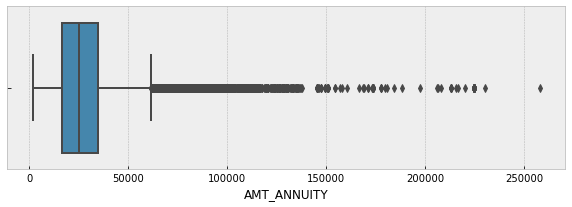

In [21]:
# box plot for AMT_ANNUITY
plt.figure(figsize=[10,3])
sns.boxplot(app_data["AMT_ANNUITY"])
plt.show()

*Inference : In the above boxplot, there seems to be an outliers which are very large(above 200000) and inappropriate to fill those missing values using mean. Further taking median will be the best choice for it.

In [23]:
round(app_data["AMT_ANNUITY"].describe())

count    307499.0
mean      27109.0
std       14494.0
min        1616.0
25%       16524.0
50%       24903.0
75%       34596.0
max      258026.0
Name: AMT_ANNUITY, dtype: float64

In [24]:
app_data["AMT_ANNUITY"].isnull().sum()

12

In [25]:
#fill null values with median values of AMT_ANNUITY
app_data["AMT_ANNUITY"].fillna(value =app_data["AMT_ANNUITY"].median(),inplace = True)
app_data["AMT_ANNUITY"].isnull().sum()

0

# AMT_GOODS_PRICE

In [26]:
#check value_counts
app_data["AMT_GOODS_PRICE"].value_counts(normalize=True)*100

450000.0     8.469793
225000.0     8.228934
675000.0     8.124778
900000.0     5.017690
270000.0     3.719653
               ...   
1265751.0    0.000325
503266.5     0.000325
810778.5     0.000325
666090.0     0.000325
743863.5     0.000325
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

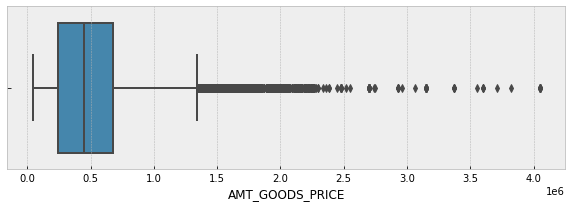

In [27]:
#boxplot for AMT_GOODS_PRICE
plt.figure(figsize=[10,3])
sns.boxplot(app_data["AMT_GOODS_PRICE"])
plt.show()

*Inference : In the above boxplot of AMT_GOODS_PRICE, outliers are clearly visible from the range 2.0-2.5 till 4.0 and above.Using mean might not be the appropriate one if it's about filling up the missing values. So, median will be used here.

In [28]:
round(app_data["AMT_GOODS_PRICE"].describe())

count     307233.0
mean      538396.0
std       369446.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [29]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [31]:
#filling null vlaues with median values of AMT_GOOD_PRICE
app_data['AMT_GOODS_PRICE'].fillna(value=app_data['AMT_GOODS_PRICE'].median(),inplace=True)
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

# AMT_REQ_CREDIT_BUREAU

In [32]:
# describe AMT_REQ_CREDIT_BUREAU

app_data.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR' : 'AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [33]:
# fill NaN Value with mode (0)

app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=0, inplace=True)

In [34]:
app_data.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR' : 'AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [35]:
#check for null values
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

# NAME_TYPE_SUITE

In [37]:
#chek for value_counts()
app_data['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [38]:
app_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [39]:
#fill nan value with mode of NAME_TYPE_SUITE
app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode,inplace=True)
app_data['NAME_TYPE_SUITE'].isnull().sum()

0

# CODE_GENDER 

In [43]:
#check value_counts()
app_data['CODE_GENDER'].value_counts(normalize=True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [44]:
#replace xna with mode(f)
app_data['CODE_GENDER']=app_data['CODE_GENDER'].replace('XNA','F')

In [45]:
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

# ORGANIZATION_TYPE 

In [46]:
#check value_counts()
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [47]:
#replace XNA with other
app_data['ORGANIZATION_TYPE']=app_data['ORGANIZATION_TYPE'].replace('XNA','other')

In [48]:
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
other                     55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

# DAYS

In [49]:
app_data['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [50]:
#remove (-)signs from DAYS_BIRTH
app_data['DAYS_BIRTH']=app_data['DAYS_BIRTH'].apply(lambda x:abs(x))

In [51]:
app_data['DAYS_BIRTH'].unique()

array([ 9461, 16765, 19046, ...,  7951,  7857, 25061], dtype=int64)

In [ ]:
#remove (-)sign from DAYS_EMPLOYED , REGISTRATION,ID_PUBLISH

In [52]:
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x: abs(x))
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].apply(lambda x: abs(int(x)))
app_data['DAYS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH'].apply(lambda x: abs(x))

In [53]:
print('DAYS_EMPLOYED', app_data['DAYS_EMPLOYED'].unique())
print('DAYS_REGISTRATION', app_data['DAYS_REGISTRATION'].unique())
print('DAYS_ID_PUBLISH', app_data['DAYS_ID_PUBLISH'].unique())

DAYS_EMPLOYED [  637  1188   225 ... 12971 11084  8694]
DAYS_REGISTRATION [ 3648  1186  4260 ... 16396 14558 14798]
DAYS_ID_PUBLISH [2120  291 2531 ... 6194 5854 6211]


# OCCUPATION_TYPE

In [54]:
app_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [55]:
app_data['OCCUPATION_TYPE'].isnull().sum()

96391

In [56]:
#fill NaN with unknown values
app_data['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [57]:
app_data['OCCUPATION_TYPE'].isnull().sum()

0

# CNT_FAM_MEMBERS

In [58]:
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [59]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [60]:
#fill NaN with median(2)
app_data['CNT_FAM_MEMBERS'].fillna(2,inplace=True)

In [61]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

# Convert to int

In [62]:
# Convert columns to integer Data Type

app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].apply(lambda x: int(x))
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_MON'] = app_data['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

In [63]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

# Checking Imbalance

In [64]:
app_data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [65]:
count0=(app_data['TARGET'] == 0).sum()
count1=(app_data['TARGET'] == 1).sum()

count0 = (count0/len(app_data['TARGET']))*100
count1 = (count1/len(app_data['TARGET']))*100

In [66]:
#imbalance ratio
ratio = count0/count1
round(ratio,1)

11.4

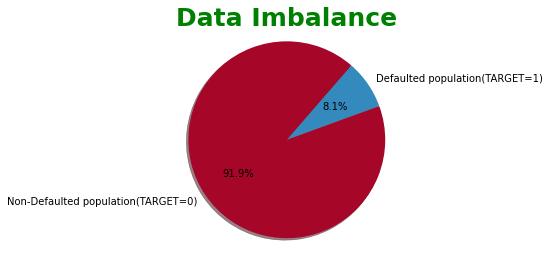

In [67]:
#pie chart for data imbalance
x=['Defaulted population(TARGET=1)','Non-Defaulted population(TARGET=0)']
y=[count1 , count0]

fig1,ax1 = plt.subplots()
ax1.pie(y,labels=x,autopct='%1.1f%%',shadow=True,startangle=20)
ax1.axis('equal')
plt.title('Data Imbalance',fontsize=25, color='green', fontweight='bold')
plt.show()

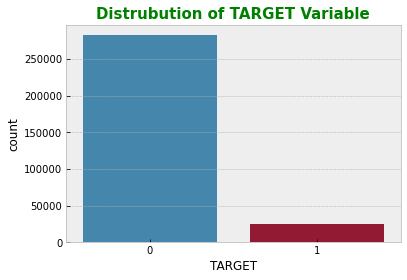

In [68]:
#distribution of target variable using countplot
sns.countplot(app_data['TARGET'])
plt.title('Distrubution of TARGET Variable', fontsize=15, color='green', fontweight='bold')
plt.show()

# Outliers

In [69]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,16036.995067,67724.742149,4986.120327,2994.202373,2.152664,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,4363.988632,139443.751806,3522.886321,1509.450419,0.910679,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,7489.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,12413.000000,933.000000,2010.000000,1720.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# convert income into categorical

In [70]:
app_data['AMT_INCOME_TOTAL'].quantile([0.9,0.95])

0.90    270000.0
0.95    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [71]:
app_data['AMT_INCOME_TOTAL_ORIGINAL']=app_data['AMT_INCOME_TOTAL']

In [73]:
#crearing bin variable
app_data['AMT_INCOME_TOTAL']=pd.qcut(app_data['AMT_INCOME_TOTAL_ORIGINAL'],
                                   q=[0,0.20,0.50,0.90,1],
                                   labels=['Low','Medium','High','Very_high'])

In [74]:
#verifying bin variable
app_data['AMT_INCOME_TOTAL'].value_counts()

High         126590
Medium        90089
Low           63671
Very_high     27161
Name: AMT_INCOME_TOTAL, dtype: int64

# Create Age Column using DAYS_BIRTH

In [75]:
#converting days of birht into years
app_data['AGE']=(app_data['DAYS_BIRTH']//365.25)

In [76]:
app_data['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [77]:
app_data['AGE_GROUP']=pd.cut(app_data['AGE'],
                             bins =[20,30,40,50,60,1000],
                            labels=['20-30','30-40','40-50','50-60','60_above'])
app_data['AGE_GROUP'].value_counts()

30-40       83212
40-50       74347
50-60       67864
20-30       52963
60_above    29124
Name: AGE_GROUP, dtype: int64

# Univariate Analysis

### Univariate Analysis for Categorical

In [78]:
#creating two different datasets
target_0 = app_data[app_data['TARGET']==0]
target_1 = app_data[app_data['TARGET']==1]

In [80]:
#function of plot for categorical variables
def univariate_categorical(column):
    plt.figure(figsize=[15,5])
    
    plt.subplot(1,2,1)
    sns.countplot(data=target_1, x=target_1[column])
    plt.title('Distribution of '+ '%s' %column +' on Defaulters',
              fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    sns.countplot(data=target_0, x=target_0[column])
    plt.title('Distribution of '+ '%s' %column +' on Non-Defaulters',
              fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation=90)

    plt.show()

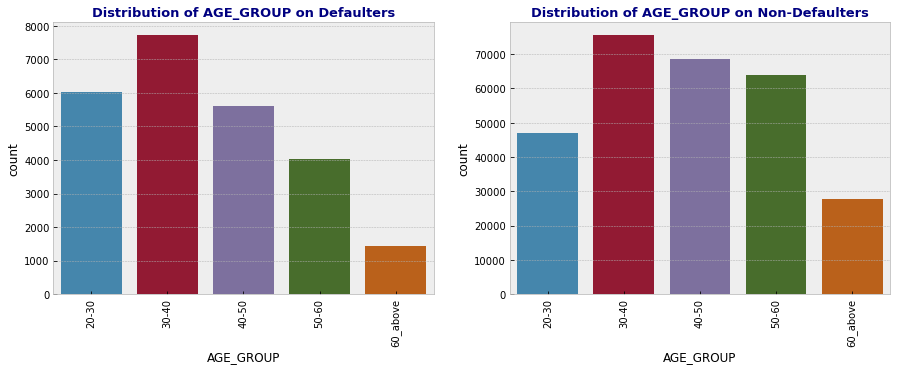

In [81]:
univariate_categorical('AGE_GROUP')

*Inference: As per the above plot, there seems to be an increase in number of people of age group 20-30 that to defaulters (facing payment difficulties in loan) while comparing with non-defaulters.

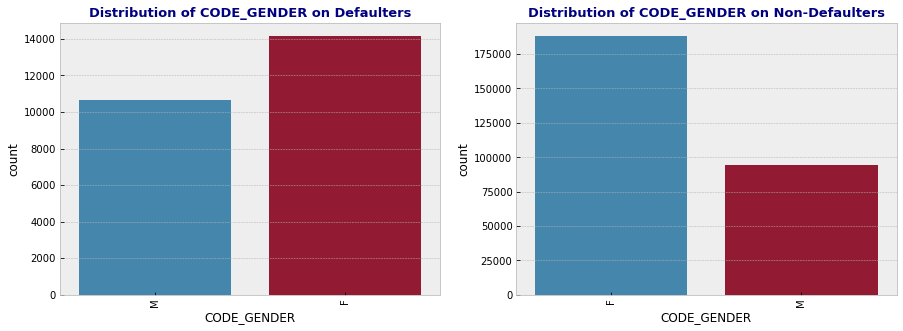

In [82]:
univariate_categorical('CODE_GENDER')

*Inference: Females are the majority in both Defaulters and Non-Defaulters. Undoubtedly, most females have applied for loan than males.

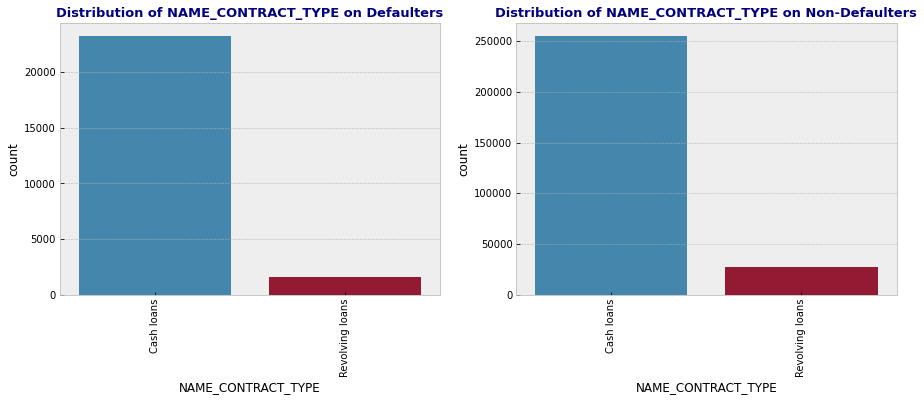

In [83]:
univariate_categorical('NAME_CONTRACT_TYPE')

*Inference: Most of applications of Cash loans but Revolving loans are lesser in the defaulted population. Hence revolving loans are comparatively safer.

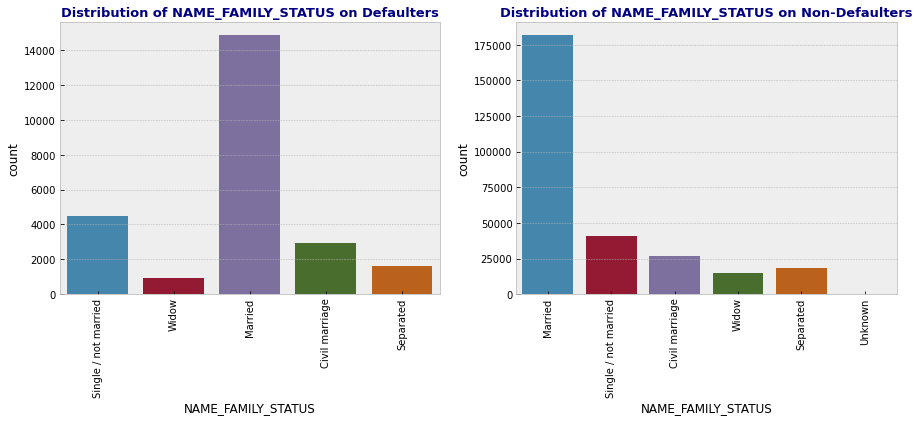

In [84]:
univariate_categorical('NAME_FAMILY_STATUS')

*Inference: Most of pepoles are Married. Single / not married is proportionally higher in dafaulted population as compared to non defaulted population. This concludes that Single applicants have higher defaults.

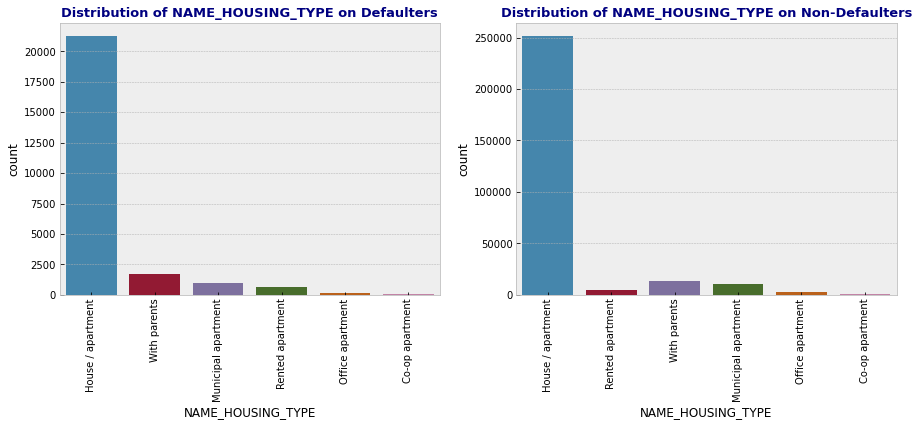

In [85]:
univariate_categorical('NAME_HOUSING_TYPE')

*Inference:

1.Population living in Rented apartments have higher default rate. Those population living in rental apartment means a cash outflow towards rent is more thus less cash left for repayment of loan.
2.Population living in with parents have higher default rate. Those population living with parents may suggest that the income is not too high thus they face difficulty in repayment of loan.

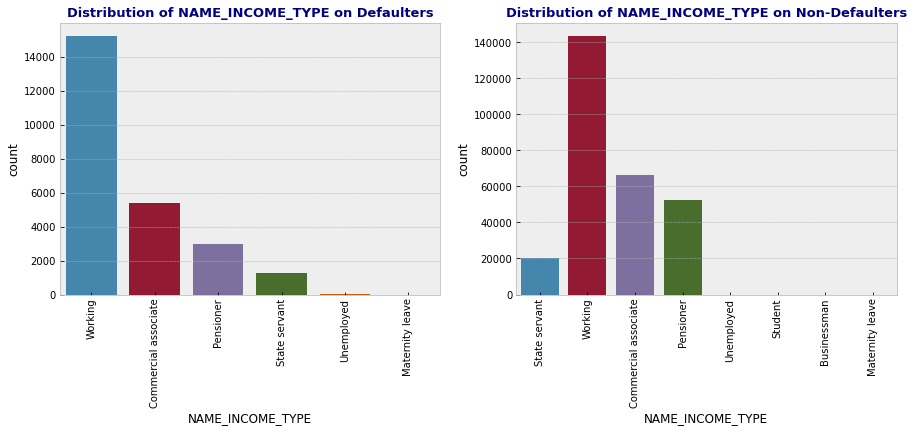

In [86]:
univariate_categorical('NAME_INCOME_TYPE')

**Inference :

1.It seems like most of the defaulters are the working people, so as in Non-Defaulter.And there seems to be moderate rate in Commercial associate, Pensioner and state servant.

2.Least count to be seen in Unemployed, Maternity Leave, Businessman and Student.

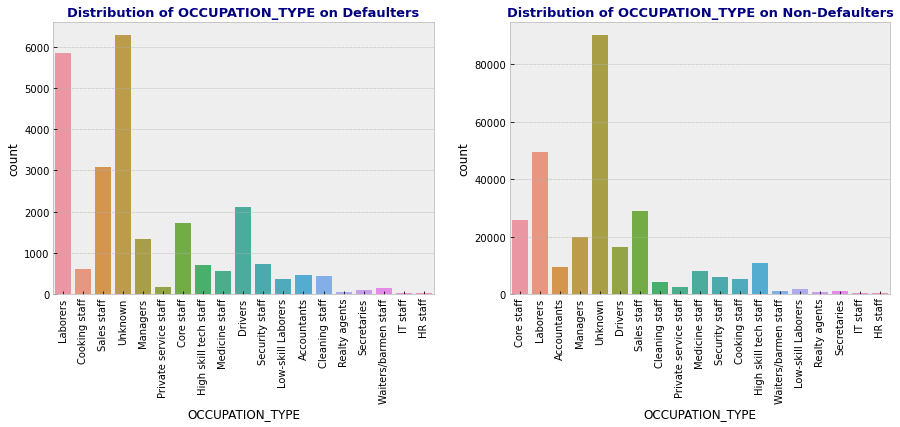

In [87]:
univariate_categorical('OCCUPATION_TYPE')

*Inference: 
1.In the above plot, Sales ,core staff has highest number of loan applications but when it comes to Non repayment of loan then the highest number can be seen in Low-skill laborer’s, Drivers, Sales staff and so on..

2.People having other occupation and laborers are highest in both the cases.
Sales Staff, Core staff has highest number of applicants in Defaulters.

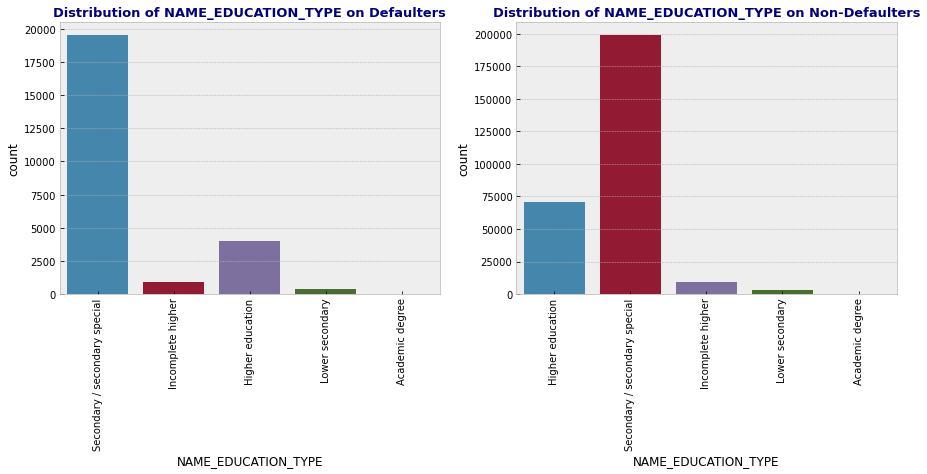

In [88]:
univariate_categorical('NAME_EDUCATION_TYPE')

**Inference:

Higher education count is proportionally lesser in dafualted population as compared to non defaulted population.
Hence higher the education level, lower the default rate.

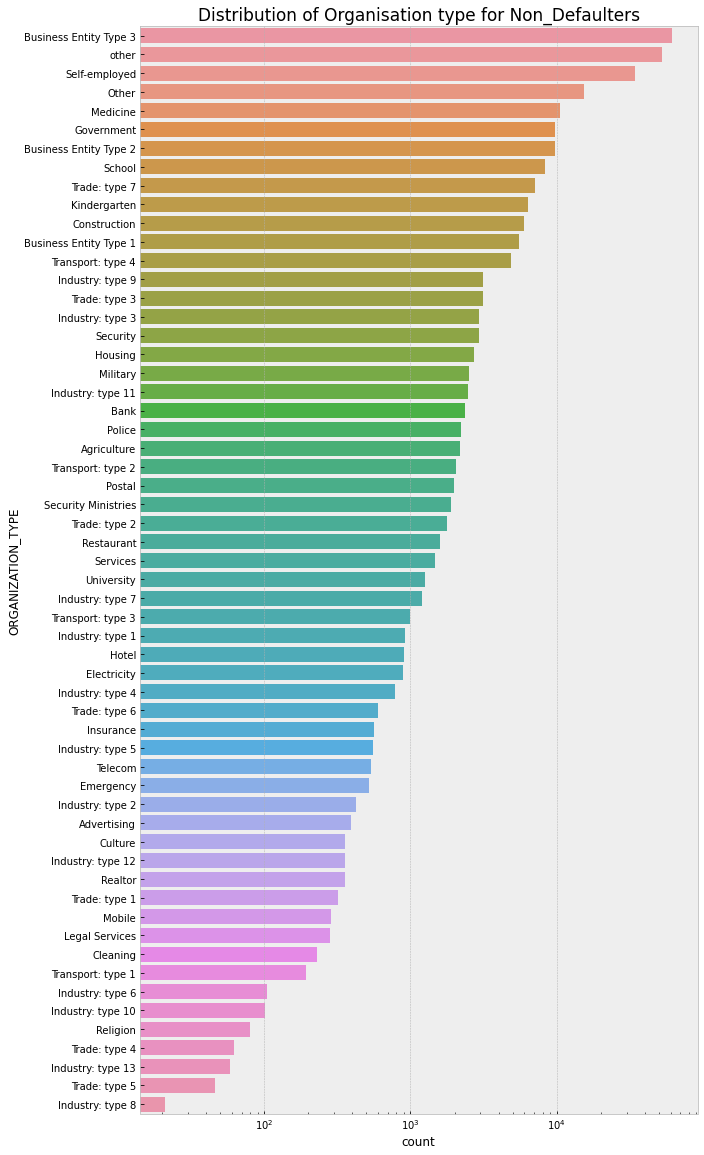

In [91]:
plt.figure(figsize=(10,20))

plt.title("Distribution of Organisation type for Non_Defaulters",fontsize=17)
plt.xscale('log')
sns.countplot(data=target_0,y='ORGANIZATION_TYPE',
             order=target_0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

**Inference:

1.Highest number of loan applications are from most of the organization type ‘Other’ , ‘Business entity Type 3’ , ‘Self employed’ , ‘Medicine’ and ‘Government’.
2.Less applications are from Industry type 8,type 5, type 13, type 4 and religion.

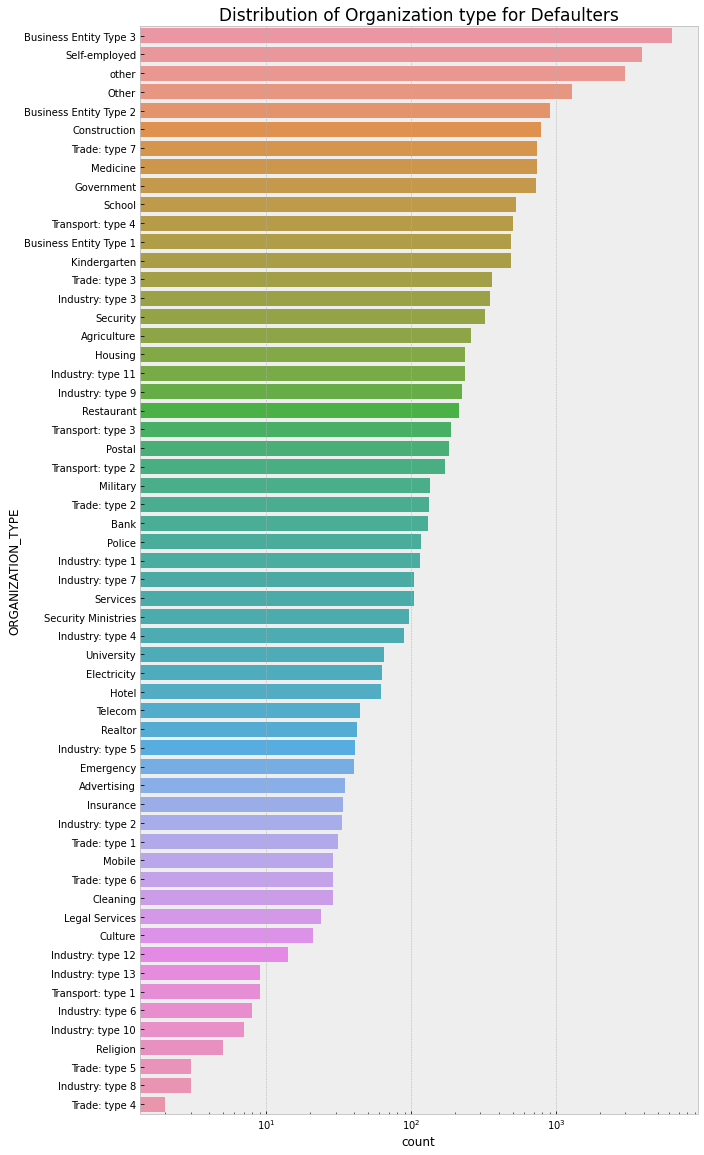

In [92]:
plt.figure(figsize=(10,20))

plt.title("Distribution of Organization type for Defaulters", fontsize=17)
plt.xscale('log')
sns.countplot(data=target_1, y='ORGANIZATION_TYPE', 
              order=target_1['ORGANIZATION_TYPE'].value_counts().index
             )

plt.show()

**Inference:

1.Highest number of loan applications are from most of the organization type 'Business entity Type 3', 'Other' , 'Self employed' , 'Business entity Type 2' and 'Construction'.
2.Less applications are from Industry type 4,type 8, type 5, type 10 and religion.

## Univariate Analysis For Numerical

In [93]:
def univariate_numerical(column):
    plt.figure(figsize=[15,4])
    
    sns.scatterplot(data=app_data, x=column, y=app_data.index, hue='TARGET')
    
    plt.title('Distribution of '+ '%s' %column +' for Defaulters  and Non-Defaulters', 
              fontdict={'size':15, 'color':'purple', 'fontweight':'bold'})
    
    plt.show()

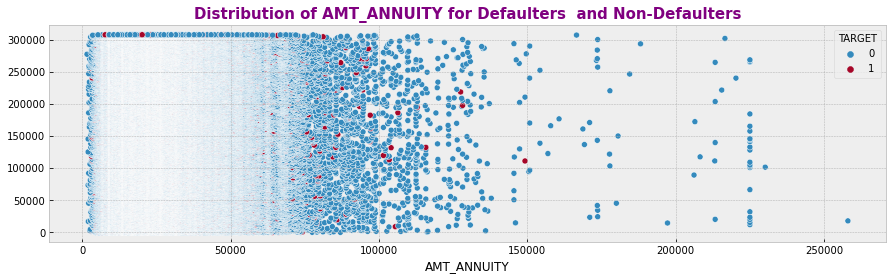

In [94]:
univariate_numerical('AMT_ANNUITY')

**Inference: In the above scatterplot,outliers are visisble in annuity amount and most of values are upto 75k. 

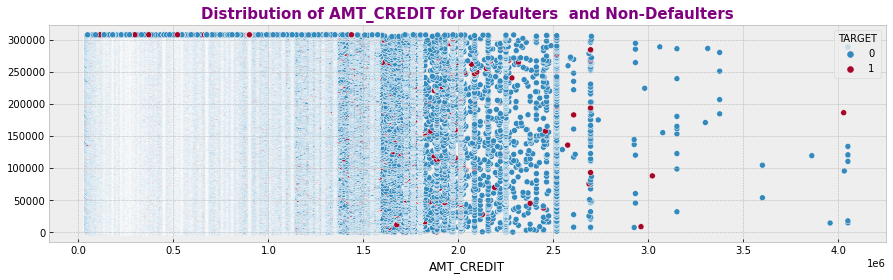

In [95]:
univariate_numerical('AMT_CREDIT')

**Inference: In the above scatterplot,there is a visisbility of outliers and most of the values are in between 0.1 to 2 lakhs.

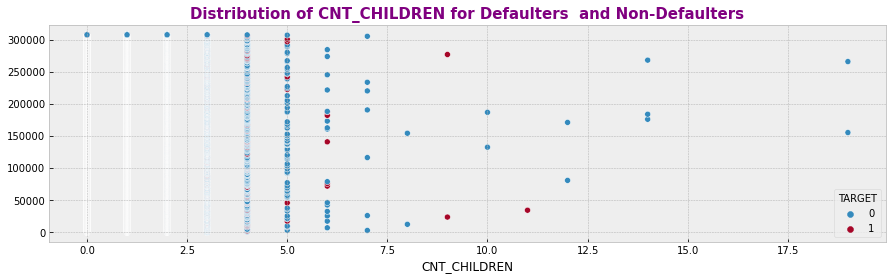

In [96]:
univariate_numerical('CNT_CHILDREN')

**Inference: Most of people have 1 or 2 child ,also there are few outliers available

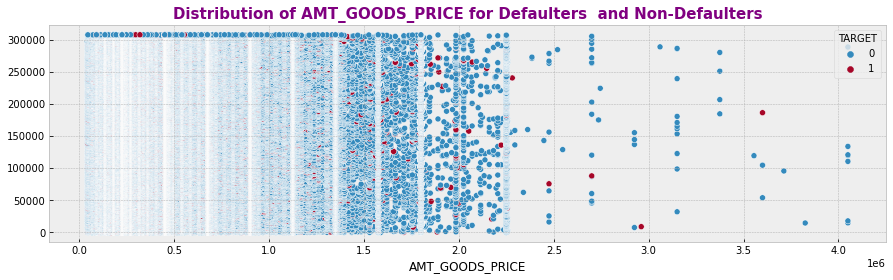

In [98]:
univariate_numerical('AMT_GOODS_PRICE')

**Inference: In the above scatterplot,there is a visibility of outliers and most of values are upto 1.5 lakh.

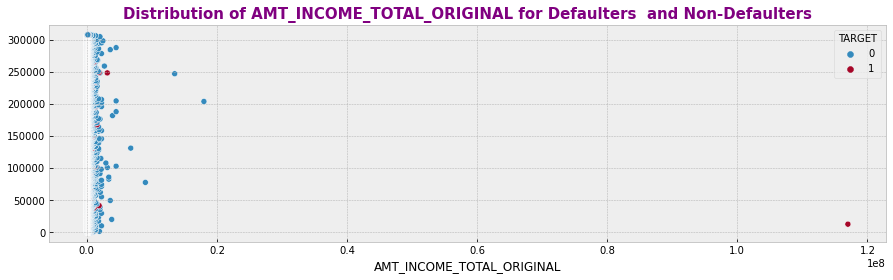

In [100]:
univariate_numerical('AMT_INCOME_TOTAL_ORIGINAL')

# Bivariate Analysis And Multivariate Analysis

## correlation for TARGET = 0

In [101]:
# Finding correlation for numerical columns for target 0

corr_df_0 = target_0[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_EMPLOYED',
                      'CNT_FAM_MEMBERS', 'CNT_CHILDREN','AGE', 'DAYS_ID_PUBLISH',
                      'DAYS_REGISTRATION', 'LIVE_CITY_NOT_WORK_CITY']].corr()
corr_df_0

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CNT_CHILDREN,AGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,LIVE_CITY_NOT_WORK_CITY
AMT_ANNUITY,1.000000,0.771297,0.776421,-0.104975,0.075789,0.020909,-0.012247,-0.014111,-0.039435,0.010577
AMT_CREDIT,0.771297,1.000000,0.987022,-0.070104,0.064536,0.003081,0.047419,0.001464,-0.013477,0.002506
AMT_GOODS_PRICE,0.776421,0.987022,1.000000,-0.068527,0.062763,-0.000559,0.044684,0.003677,-0.015891,0.001285
DAYS_EMPLOYED,-0.104975,-0.070104,-0.068527,1.000000,-0.238300,-0.245174,0.626058,0.276663,0.214511,-0.221387
CNT_FAM_MEMBERS,0.075789,0.064536,0.062763,-0.238300,1.000000,0.878571,-0.285784,0.020460,-0.175629,0.078843
CNT_CHILDREN,0.020909,0.003081,-0.000559,-0.245174,0.878571,1.000000,-0.336896,0.028751,-0.185792,0.070988
AGE,-0.012247,0.047419,0.044684,0.626058,-0.285784,-0.336896,1.000000,0.270735,0.333012,-0.160039
DAYS_ID_PUBLISH,-0.014111,0.001464,0.003677,0.276663,0.020460,0.028751,0.270735,1.000000,0.100236,-0.062259
DAYS_REGISTRATION,-0.039435,-0.013477,-0.015891,0.214511,-0.175629,-0.185792,0.333012,0.100236,1.000000,-0.072248
LIVE_CITY_NOT_WORK_CITY,0.010577,0.002506,0.001285,-0.221387,0.078843,0.070988,-0.160039,-0.062259,-0.072248,1.000000


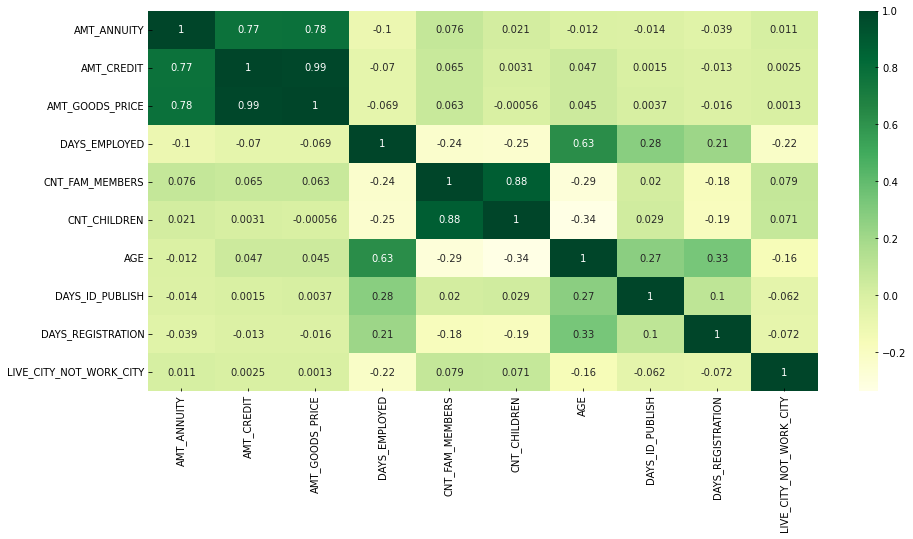

In [105]:
#heatmap for correlation of target 0
plt.figure(figsize=[15,7])
sns.heatmap(corr_df_0,annot=True,cmap='YlGn')
plt.show()

In [106]:
corr_list = corr_df_0.corr().abs().unstack()
corr_list = corr_list.dropna()
corr_list = corr_list[corr_list != 1]
corr_list = corr_list.sort_values(ascending=False)
corr_list.head(20)

AMT_GOODS_PRICE    AMT_CREDIT           0.999892
AMT_CREDIT         AMT_GOODS_PRICE      0.999892
CNT_FAM_MEMBERS    CNT_CHILDREN         0.989963
CNT_CHILDREN       CNT_FAM_MEMBERS      0.989963
AMT_ANNUITY        AMT_GOODS_PRICE      0.959782
AMT_GOODS_PRICE    AMT_ANNUITY          0.959782
AMT_CREDIT         AMT_ANNUITY          0.958846
AMT_ANNUITY        AMT_CREDIT           0.958846
AGE                DAYS_EMPLOYED        0.894474
DAYS_EMPLOYED      AGE                  0.894474
CNT_FAM_MEMBERS    AGE                  0.788633
AGE                CNT_FAM_MEMBERS      0.788633
                   CNT_CHILDREN         0.785624
CNT_CHILDREN       AGE                  0.785624
DAYS_EMPLOYED      CNT_FAM_MEMBERS      0.672513
CNT_FAM_MEMBERS    DAYS_EMPLOYED        0.672513
DAYS_EMPLOYED      CNT_CHILDREN         0.652237
CNT_CHILDREN       DAYS_EMPLOYED        0.652237
CNT_FAM_MEMBERS    DAYS_REGISTRATION    0.603704
DAYS_REGISTRATION  CNT_FAM_MEMBERS      0.603704
dtype: float64

In [107]:
for i in range(0,20,2):
    print(corr_list.index[i])

('AMT_GOODS_PRICE', 'AMT_CREDIT')
('CNT_FAM_MEMBERS', 'CNT_CHILDREN')
('AMT_ANNUITY', 'AMT_GOODS_PRICE')
('AMT_CREDIT', 'AMT_ANNUITY')
('AGE', 'DAYS_EMPLOYED')
('CNT_FAM_MEMBERS', 'AGE')
('AGE', 'CNT_CHILDREN')
('DAYS_EMPLOYED', 'CNT_FAM_MEMBERS')
('DAYS_EMPLOYED', 'CNT_CHILDREN')
('CNT_FAM_MEMBERS', 'DAYS_REGISTRATION')


## correlation for TARGET=1

In [108]:
# Finding correlation for numerical columns for target 1

corr_df_1 = target_1[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_EMPLOYED',
                      'CNT_FAM_MEMBERS', 'CNT_CHILDREN','AGE', 'DAYS_ID_PUBLISH',
                      'DAYS_REGISTRATION', 'LIVE_CITY_NOT_WORK_CITY']].corr()
corr_df_1

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CNT_CHILDREN,AGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,LIVE_CITY_NOT_WORK_CITY
AMT_ANNUITY,1.000000,0.752195,0.752295,-0.081207,0.075711,0.031257,0.014063,0.016767,-0.034279,0.009902
AMT_CREDIT,0.752195,1.000000,0.982783,0.001930,0.051224,-0.001675,0.135166,0.052329,0.025854,-0.016509
AMT_GOODS_PRICE,0.752295,0.982783,1.000000,0.006648,0.047367,-0.008111,0.135630,0.056061,0.025661,-0.016703
DAYS_EMPLOYED,-0.081207,0.001930,0.006648,1.000000,-0.186515,-0.192864,0.582300,0.229090,0.192455,-0.198484
CNT_FAM_MEMBERS,0.075711,0.051224,0.047367,-0.186515,1.000000,0.885484,-0.203281,0.031785,-0.145828,0.061316
CNT_CHILDREN,0.031257,-0.001675,-0.008111,-0.192864,0.885484,1.000000,-0.259124,0.032299,-0.149154,0.053515
AGE,0.014063,0.135166,0.135630,0.582300,-0.203281,-0.259124,1.000000,0.252197,0.289104,-0.123538
DAYS_ID_PUBLISH,0.016767,0.052329,0.056061,0.229090,0.031785,0.032299,0.252197,1.000000,0.096833,-0.031431
DAYS_REGISTRATION,-0.034279,0.025854,0.025661,0.192455,-0.145828,-0.149154,0.289104,0.096833,1.000000,-0.062636
LIVE_CITY_NOT_WORK_CITY,0.009902,-0.016509,-0.016703,-0.198484,0.061316,0.053515,-0.123538,-0.031431,-0.062636,1.000000


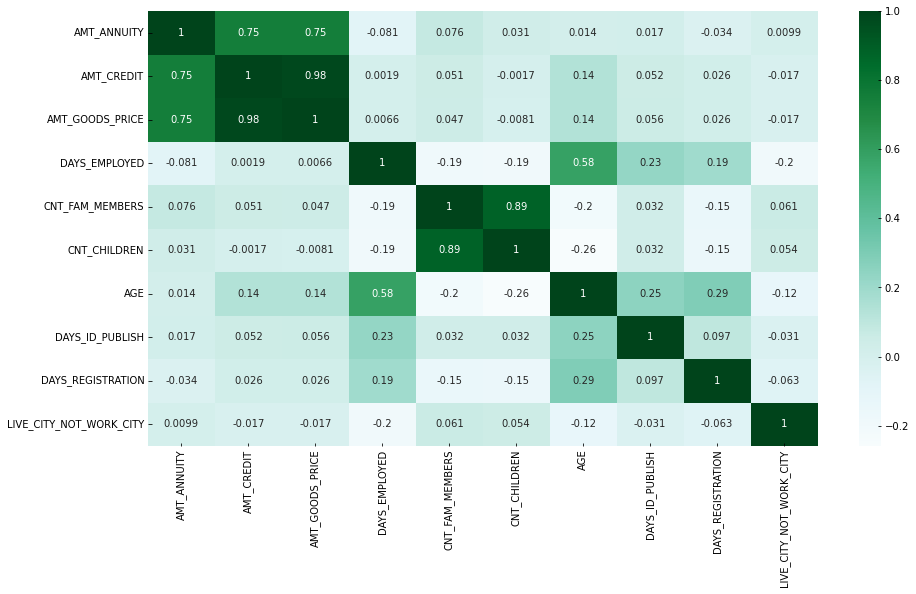

In [112]:
#heatmap for corrleation for target 1
plt.figure(figsize=[15,8])
sns.heatmap(corr_df_1,annot=True,cmap='BuGn')
plt.show()

In [113]:
corr_list = corr_df_1.corr().abs().unstack()
corr_list = corr_list.dropna()
corr_list = corr_list[corr_list != 1]
corr_list = corr_list.sort_values(ascending=False)
corr_list.head(20)

AMT_GOODS_PRICE    AMT_CREDIT           0.999795
AMT_CREDIT         AMT_GOODS_PRICE      0.999795
CNT_FAM_MEMBERS    CNT_CHILDREN         0.990733
CNT_CHILDREN       CNT_FAM_MEMBERS      0.990733
AMT_CREDIT         AMT_ANNUITY          0.942931
AMT_ANNUITY        AMT_CREDIT           0.942931
                   AMT_GOODS_PRICE      0.942361
AMT_GOODS_PRICE    AMT_ANNUITY          0.942361
AGE                DAYS_EMPLOYED        0.854309
DAYS_EMPLOYED      AGE                  0.854309
CNT_CHILDREN       AGE                  0.735509
AGE                CNT_CHILDREN         0.735509
CNT_FAM_MEMBERS    AGE                  0.727485
AGE                CNT_FAM_MEMBERS      0.727485
CNT_FAM_MEMBERS    DAYS_EMPLOYED        0.615954
DAYS_EMPLOYED      CNT_FAM_MEMBERS      0.615954
CNT_CHILDREN       DAYS_EMPLOYED        0.603442
DAYS_EMPLOYED      CNT_CHILDREN         0.603442
DAYS_REGISTRATION  CNT_FAM_MEMBERS      0.555238
CNT_FAM_MEMBERS    DAYS_REGISTRATION    0.555238
dtype: float64

In [114]:
for i in range(0,20,2):
    print(corr_list.index[i])

('AMT_GOODS_PRICE', 'AMT_CREDIT')
('CNT_FAM_MEMBERS', 'CNT_CHILDREN')
('AMT_CREDIT', 'AMT_ANNUITY')
('AMT_ANNUITY', 'AMT_GOODS_PRICE')
('AGE', 'DAYS_EMPLOYED')
('CNT_CHILDREN', 'AGE')
('CNT_FAM_MEMBERS', 'AGE')
('CNT_FAM_MEMBERS', 'DAYS_EMPLOYED')
('CNT_CHILDREN', 'DAYS_EMPLOYED')
('DAYS_REGISTRATION', 'CNT_FAM_MEMBERS')


# categorical vs numerical

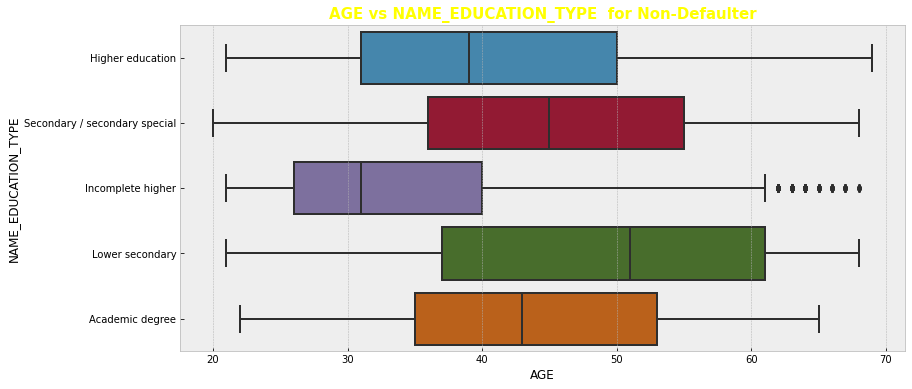

In [115]:
plt.figure(figsize=[13,6])
sns.boxplot(data = target_0, 
            y='NAME_EDUCATION_TYPE',
            x='AGE')
plt.title('AGE vs NAME_EDUCATION_TYPE  for Non-Defaulter', 
          fontdict={'size':15, 'color':'yellow', 'fontweight':'bold'})
plt.show()

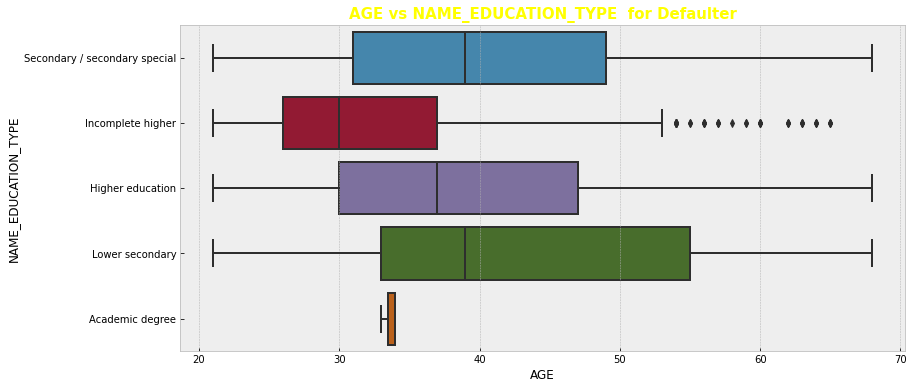

In [120]:
plt.figure(figsize=[13,6])
sns.boxplot(data = target_1, 
            y='NAME_EDUCATION_TYPE',
            x='AGE')
plt.title('AGE vs NAME_EDUCATION_TYPE  for Defaulter', 
          fontdict={'size':15, 'color':'yellow', 'fontweight':'bold'})
plt.show()

**Inference :

1.For Target = 0,

a.There is an outliers in Incomplete higher in between age 60-70.
b.Apart from Incomplete higher where first quartile lies on age 40,other education types aren't facing much difficulties in loan repayment.

2.For Taget = 1.

a.There is a visibility of an outliers in Incomplete higher from the age group between 50-70.
b.People with an age group 30-40 and education type as Academic degree and Incomplete higher seems to be facing difficulties in loan repaymet.

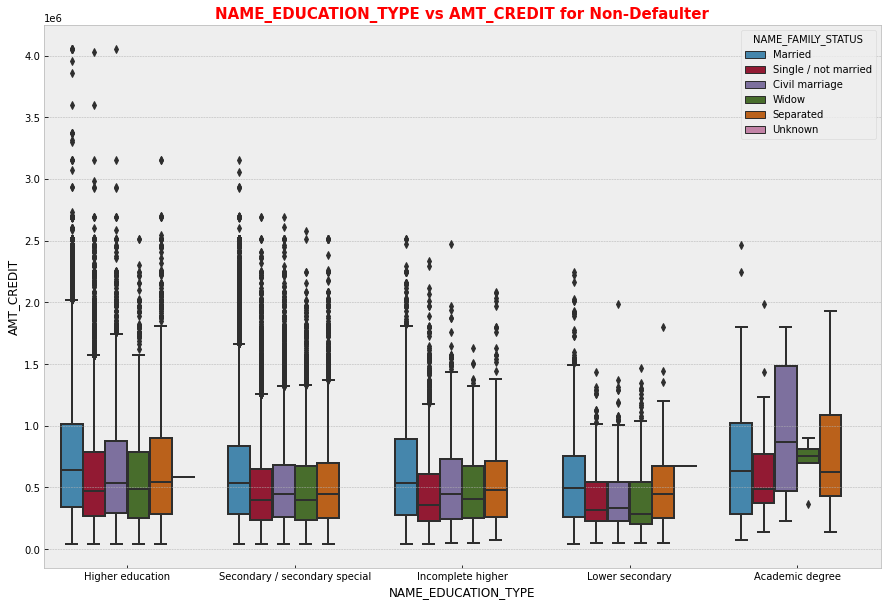

In [118]:
plt.figure(figsize=[15,10])
sns.boxplot(data = target_0, 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue='NAME_FAMILY_STATUS')
plt.title('NAME_EDUCATION_TYPE vs AMT_CREDIT for Non-Defaulter', 
          fontdict={'size':15, 'color':'red', 'fontweight':'bold'})

plt.show()

**Inference:

1.Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher credit amount than others.
2.Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
3.Civil marriage for Academic degree is having most of the credits in the third quartile.

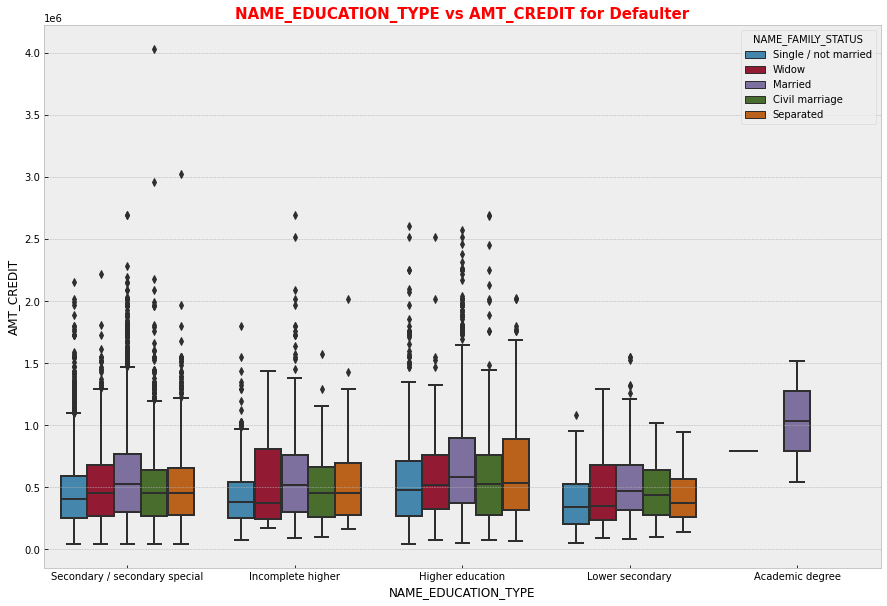

In [119]:
plt.figure(figsize=[15,10])
sns.boxplot(data = target_1, 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue='NAME_FAMILY_STATUS')
plt.title('NAME_EDUCATION_TYPE vs AMT_CREDIT for Defaulter',
          fontdict={'size':15, 'color':'red', 'fontweight':'bold'})
plt.show()

**Inference :

1.Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education have higher credit amount than others.

2.Higher education of family status of 'marriage', 'single' and 'civil marriage' seems to have more outliers.

3.Civil marriage for Academic degree has most credit amount in the third quartile.

4.Academic education category has less number of defaulters.

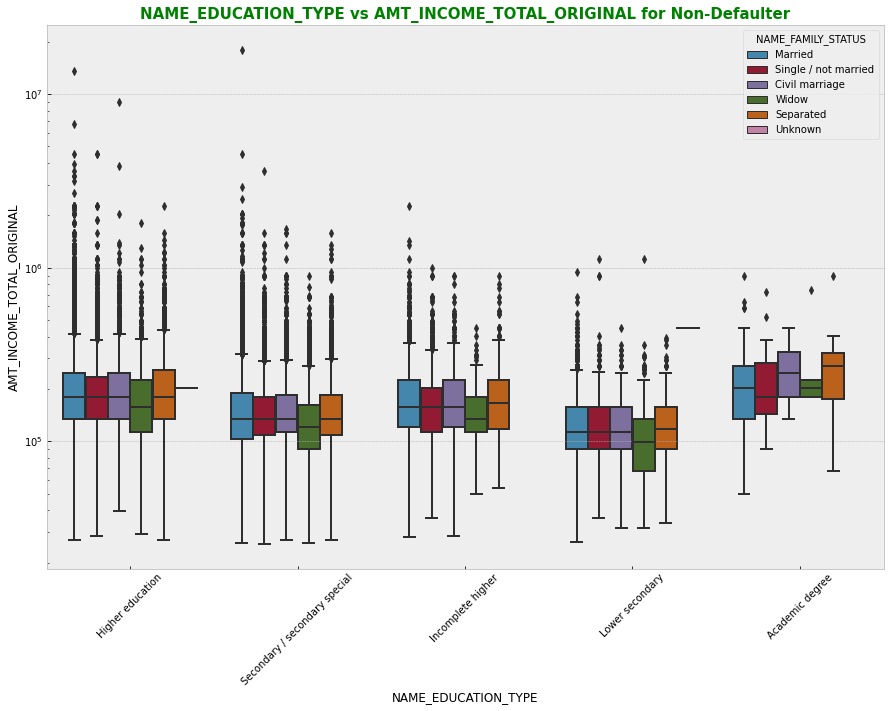

In [122]:
plt.figure(figsize=[15,10])
plt.xticks(rotation=45)
plt.yscale('log')

sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL_ORIGINAL', 
            hue ='NAME_FAMILY_STATUS',
            orient='v')

plt.title('NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL_ORIGINAL for Non-Defaulter', 
          fontdict={'size':15, 'color':'green', 'fontweight':'bold'})
plt.show()

**Inference:

1.For Education 'Higher education' type the income amount is mostly equal with family status.

2.HIgher education has more number of outliers.

3.Academic degree type having less number of outliers but their income amount is little higher that Higher education.

4.Lower secondary of widow family status are have less income amount than others.

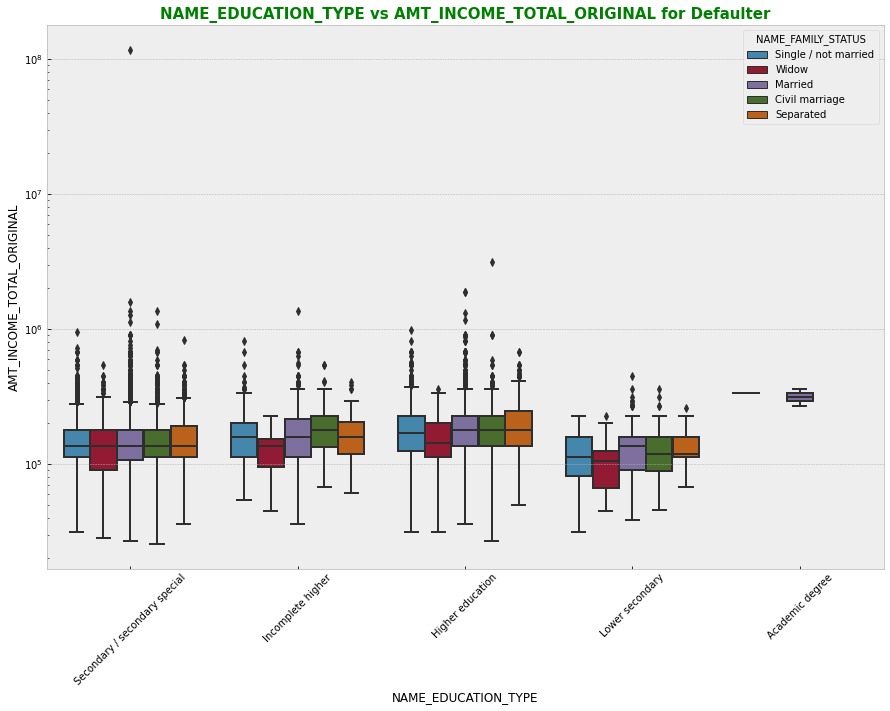

In [124]:
plt.figure(figsize=[15,10])
plt.xticks(rotation=45)
plt.yscale('log')

sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL_ORIGINAL', 
            hue ='NAME_FAMILY_STATUS',
            orient='v')
plt.title('NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL_ORIGINAL for Defaulter', 
          fontdict={'size':15, 'color':'green', 'fontweight':'bold'})

plt.show()

**Inference:

Academic education category have less number of defaulters.

## Numerical vs Numerical 

In [128]:
def bivariate_numerical(column1, column2):
    plt.figure(figsize=[15,5])

    plt.subplot(1,2,1)
    sns.scatterplot(data=target_0, x=column1, y=column2)
    plt.title('%s' %column1 + ' vs '+ '%s' %column2 + ' for Non-Defaulter \n', 
              fontdict={'size':13, 'color':'orange', 'fontweight':'bold'})
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    sns.scatterplot(data=target_1, x=column1, y=column2)
    plt.title('%s' %column1 + ' vs '+ '%s' %column2 + ' for Defaulter \n', 
              fontdict={'size':13, 'color':'orange', 'fontweight':'bold'})
    plt.xticks(rotation=90)

    plt.show()

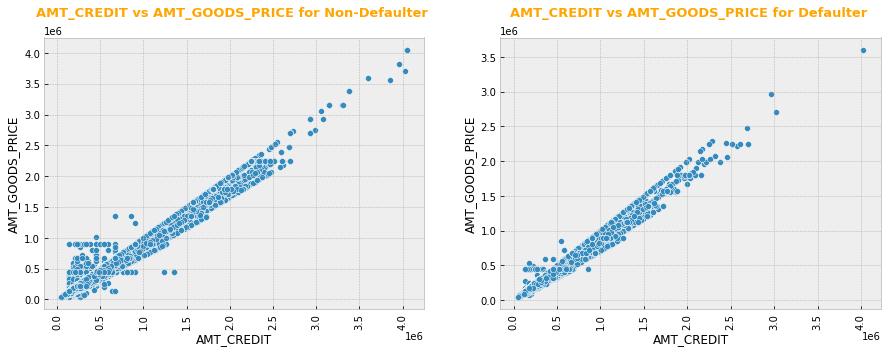

In [129]:
bivariate_numerical('AMT_CREDIT','AMT_GOODS_PRICE')

**Inference :

The defaulter seems to be in less number whenever the price of goods is upto 50k and credit amount is even lesser than 50k.

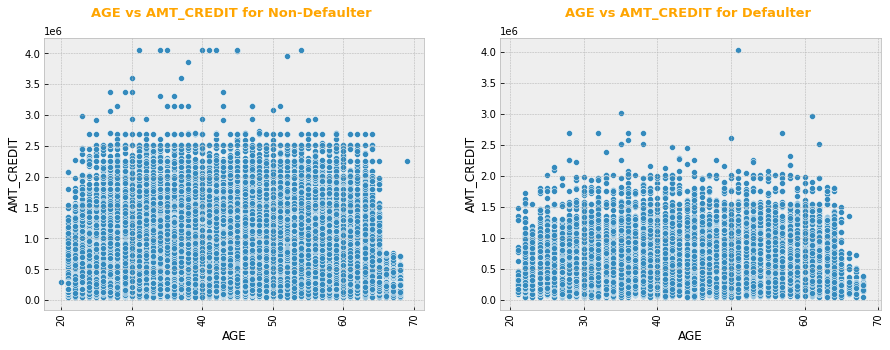

In [130]:
bivariate_numerical('AGE','AMT_CREDIT')

**Inference
1.In non-defaulter and defaulter,the credit amount seems to be less i.e.50k to 100k in the age group of 60-70 while comparing to other age group.
2.in defaulters,credit amount seems to be less around 300k in comparision to non defaulter.

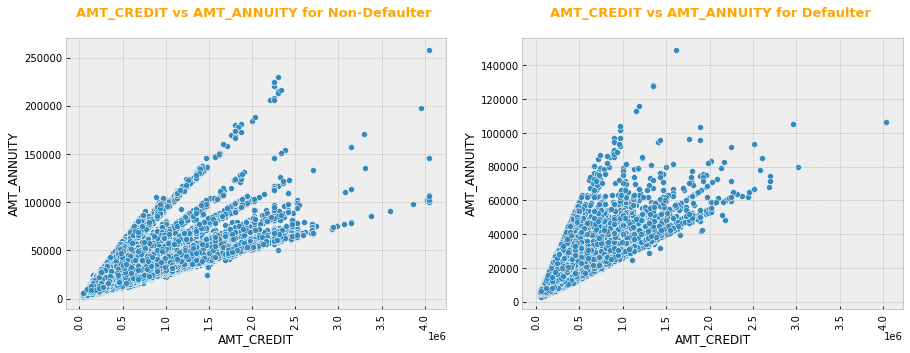

In [131]:
bivariate_numerical('AMT_CREDIT','AMT_ANNUITY')

**Inference:

1.in above scatterplot credut amount increases with the increase in annuity amount,shope seems to be bit higher in defaulters.

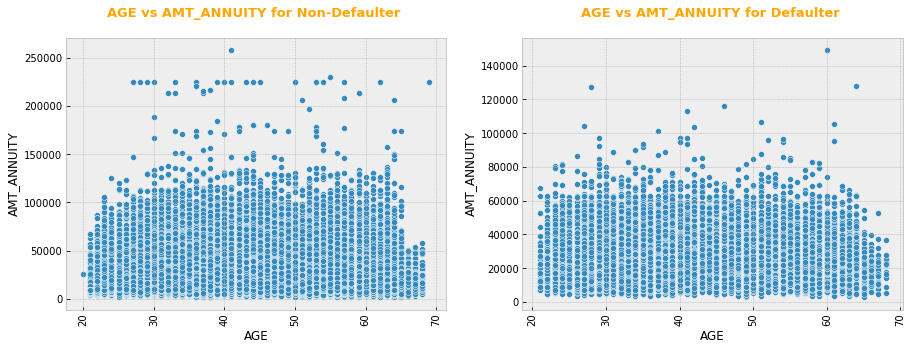

In [132]:
bivariate_numerical('AGE','AMT_ANNUITY')

**Inference:

1.people of age group 60-70 have less annuity amount in both cases.

2.annuity amount seems to be higher in non defaulters. 

## Previous Dataset

In [135]:
#reading the dataset of previous application 
prv_data = pd.read_csv('previous_application.csv')
prv_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#check null values in dataset
prv_data.isnull().sum()/len(prv_data)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [137]:
#shape of dataset
prv_data.shape

(1670214, 37)

In [138]:
#removing columns having more than 40% missing values
prv_data = prv_data.loc[:,(prv_data.isnull().sum()/len(prv_data)*100)<40]

## NAME_CASH_LOAN_PURPOSE

In [139]:
#Value count of name_cash_loan_purpose
prv_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [140]:
#drop rows in which value has xna or xap
prv_data.drop(prv_data[prv_data['NAME_CASH_LOAN_PURPOSE'].isin(['XNA','XAP'])].index,inplace=True)

In [141]:
prv_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Refused         58.674517
Approved        38.677389
Canceled         2.353701
Unused offer     0.294392
Name: NAME_CONTRACT_STATUS, dtype: float64

## Merge Prev_Dataset with App_Dataset

In [142]:
#merge dataset using inner join 
merge_dataset = pd.merge(app_data,prv_data,how='inner',on=['SK_ID_CURR'])
merge_dataset.shape

(59413, 65)

In [143]:
merge_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_ORIGINAL,AGE,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,Low,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,10341,1010,4799,3015,Laborers,1,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,0,90000.0,28.0,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,Very_high,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,15280,2668,5266,3787,Unknown,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0,0,0,1,0,5,292500.0,41.0,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,Very_high,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,11694,2060,3557,3557,Drivers,3,THURSDAY,10,0,0,0,1,1,0,Self-employed,0,0,0,0,1,1,360000.0,32.0,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,High,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236,4292,Managers,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0,0,0,1,0,1,180000.0,44.0,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,High,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236,4292,Managers,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0,0,0,1,0,1,180000.0,44.0,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


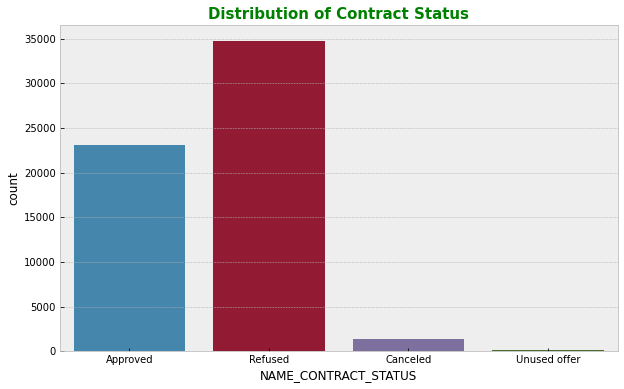

In [145]:
#plotting distribution contract status
plt.figure(figsize =[10,6])
sns.countplot(merge_dataset['NAME_CONTRACT_STATUS'])
plt.title("Distribution of Contract Status",fontdict ={'size':15,'color':'green','fontweight':'bold'})
plt.show()

**Inference: In the above plot refused application seems to be more than other status of apllications.

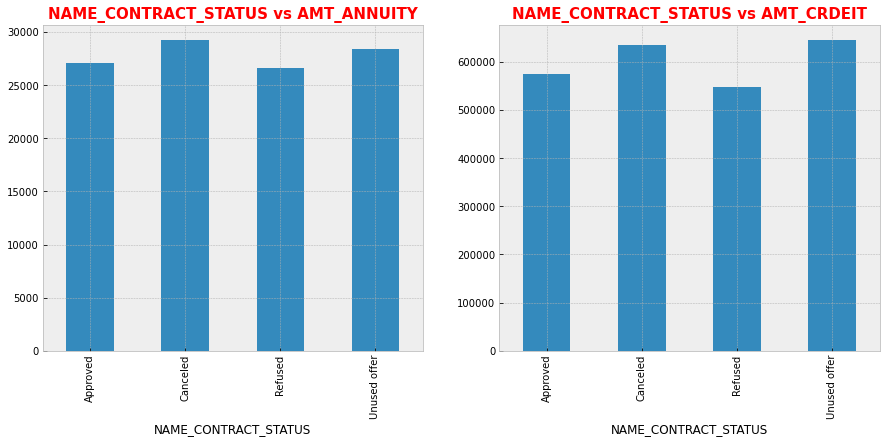

In [147]:
plt.figure(figsize=[15, 6])

plt.subplot(1,2,1)
merge_dataset.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY_x'].mean().plot.bar()
plt.title('NAME_CONTRACT_STATUS vs AMT_ANNUITY', 
         fontdict={'size':15, 'color':'red', 'fontweight':'bold'})

plt.subplot(1,2,2)
merge_dataset.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_x'].mean().plot.bar()
plt.title('NAME_CONTRACT_STATUS vs AMT_CRDEIT', 
         fontdict={'size':15, 'color':'red', 'fontweight':'bold'})

plt.show()

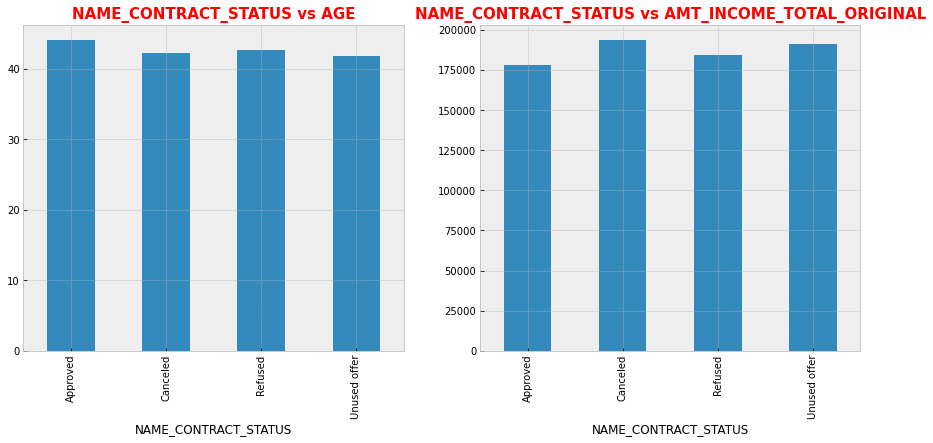

In [148]:
plt.figure(figsize=[15, 6])

plt.subplot(1,2,1)
merge_dataset.groupby('NAME_CONTRACT_STATUS')['AGE'].mean().plot.bar()
plt.title('NAME_CONTRACT_STATUS vs AGE', 
         fontdict={'size':15, 'color':'red', 'fontweight':'bold'})

plt.subplot(1,2,2)
merge_dataset.groupby('NAME_CONTRACT_STATUS')['AMT_INCOME_TOTAL_ORIGINAL'].mean().plot.bar()
plt.title('NAME_CONTRACT_STATUS vs AMT_INCOME_TOTAL_ORIGINAL', 
         fontdict={'size':15, 'color':'red', 'fontweight':'bold'})

plt.show()

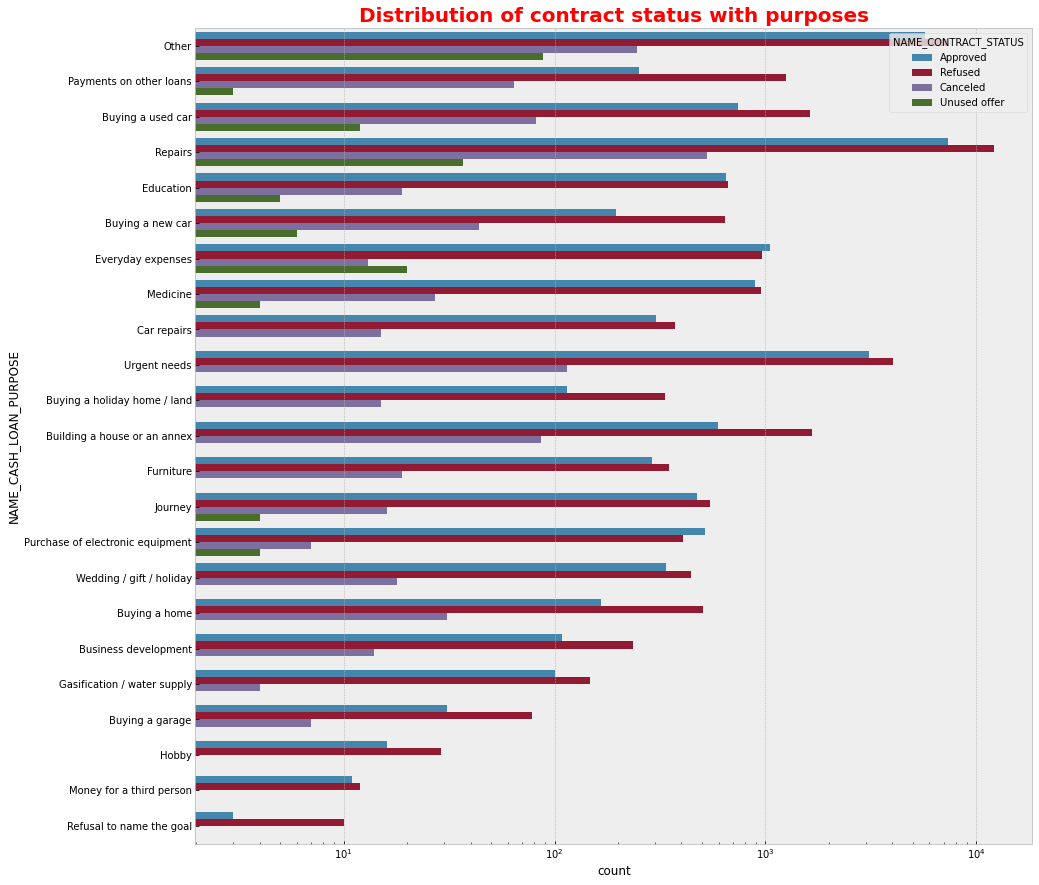

In [150]:
plt.figure(figsize=[15,15])
sns.countplot(data = merge_dataset, y= 'NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS')
plt.title('Distribution of contract status with purposes', 
          fontdict={'size':20, 'color':'red', 'fontweight':'bold'})
plt.xscale('log')
plt.show()

**Inference:

1.Most of the refused applications is from repairs.

2.In purchase of electronic equipment and everyday expenses approved application status is more than refused one.

3.Approved and refused status seems to be almost equal in education.

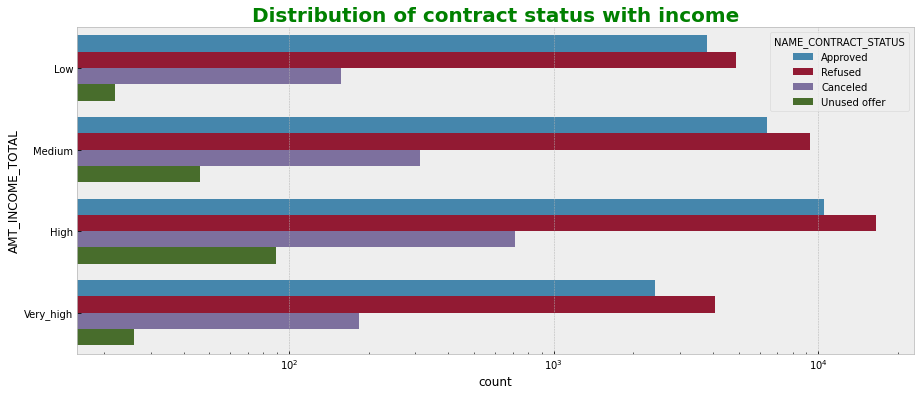

In [151]:
plt.figure(figsize=[15,6])
sns.countplot(data = merge_dataset, y= 'AMT_INCOME_TOTAL', hue='NAME_CONTRACT_STATUS')
plt.title('Distribution of contract status with income', 
          fontdict={'size':20, 'color':'green', 'fontweight':'bold'})
plt.xscale('log')
plt.show()

**Inference: Application status got refused for the people earning high salary.

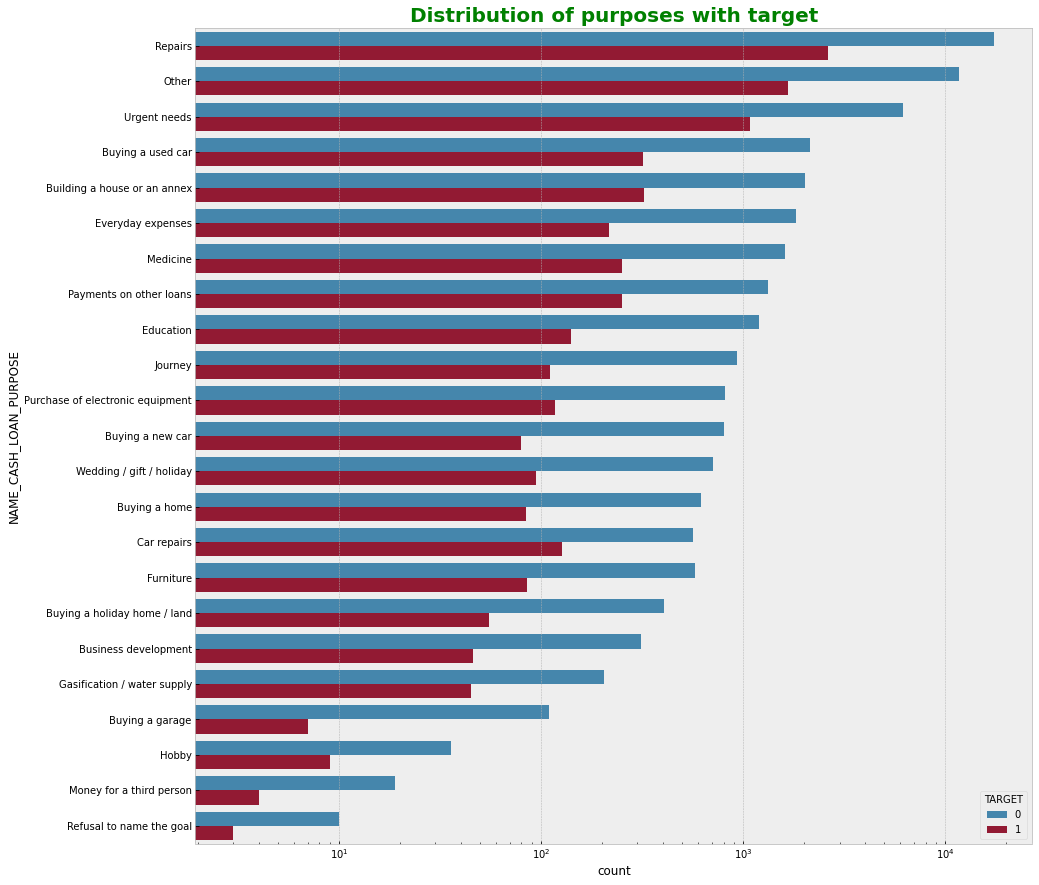

In [153]:
plt.figure(figsize=[15,15])

sns.countplot(data = merge_dataset, y= 'NAME_CASH_LOAN_PURPOSE',
              order=merge_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'TARGET')

plt.title('Distribution of purposes with target', 
          fontdict={'size':20, 'color':'green', 'fontweight':'bold'})

plt.xscale('log')
plt.show()

**Inference:

1.loan paymet is significant higher than the facing difficulties in some scenarios i.e.Buying a garage,business development,buying land,buying new car and education.

2.Loan purposes with repairs are facing more difficulties in payment on time.

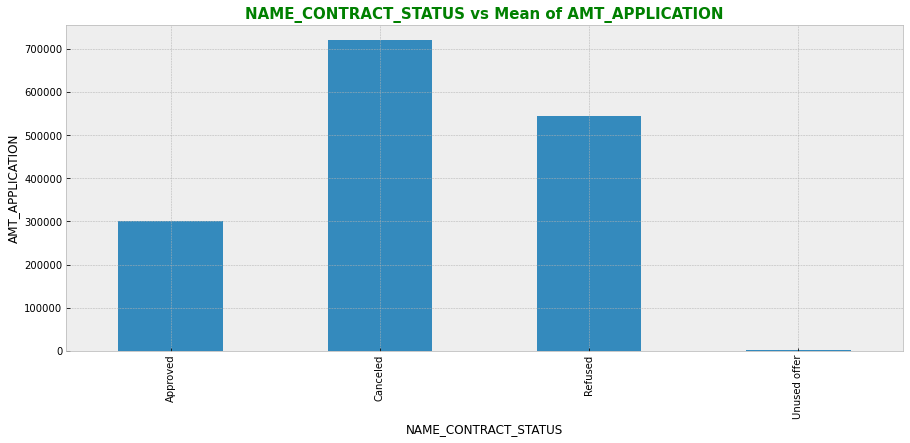

In [154]:
plt.figure(figsize=[15, 6])

merge_dataset.groupby('NAME_CONTRACT_STATUS')['AMT_APPLICATION'].mean().plot.bar()
plt.title('NAME_CONTRACT_STATUS vs Mean of AMT_APPLICATION', 
         fontdict={'size':15, 'color':'green', 'fontweight':'bold'})

plt.ylabel('AMT_APPLICATION')

plt.show()

**Inference: in the above plot ,application amount is quite high (300k)in the loan application status that are cancelled.

In [155]:
temp = merge_dataset.NAME_CONTRACT_STATUS[merge_dataset.NAME_CONTRACT_STATUS.isin(['Approved', 'Refused'])]

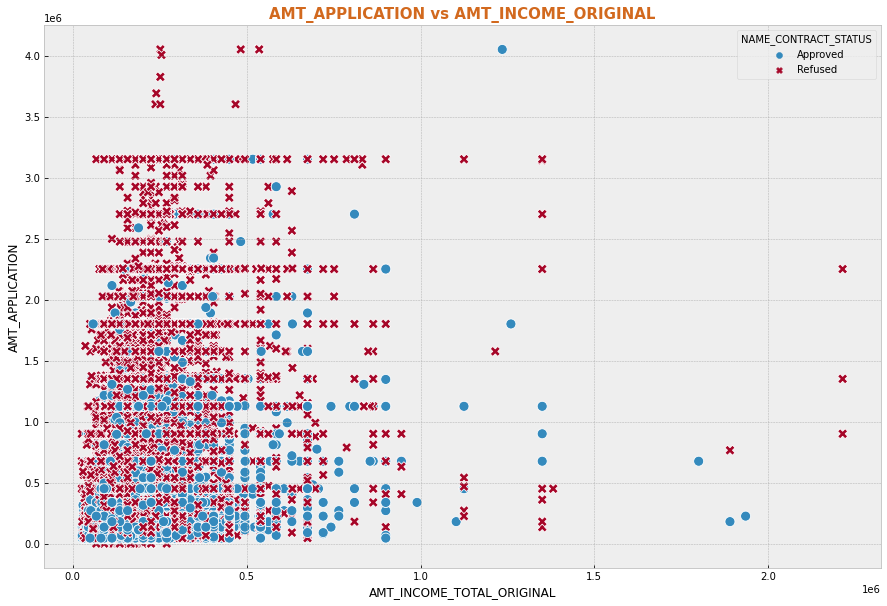

In [156]:
plt.figure(figsize=[15,10])
sns.scatterplot(y=merge_dataset.AMT_APPLICATION, 
                x=merge_dataset.AMT_INCOME_TOTAL_ORIGINAL, 
                hue=temp,
                style=temp,
                s=100)
plt.title('AMT_APPLICATION vs AMT_INCOME_ORIGINAL',
         fontdict={'size':15, 'color':'chocolate', 'fontweight':'bold'})

plt.show()

**Inference:

1.loan request higher than 200k had a higher rejection rate.

2.loan rejectin rate was much lower if the income was higher than 500k.